# Frangi Vesselness Filter

In [10]:
//load ImageJ
%classpath config resolver imagej.public https://maven.imagej.net/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

net.imagej.ImageJ@5f5441e0

This `Op` implements the algorithm for detection of vessel- or tube-like structures in 2D and 3D images described Frangi et al 1998, and is called in `ImageJ-Ops` as follows:

In [11]:
ij.op().help('frangiVesselness')

Available operations:
	(RandomAccessibleInterval out) =
	net.imagej.ops.filter.vesselness.DefaultFrangi(
		RandomAccessibleInterval out,
		RandomAccessibleInterval in,
		double[] spacing,
		int scale)

As an example we will use an [MRA of a human brain](https://commons.wikimedia.org/w/index.php?curid=5930234) (By SBarnes - Own work, CC BY-SA 3.0) 

[INFO] Populating metadata
[INFO] Populating metadata


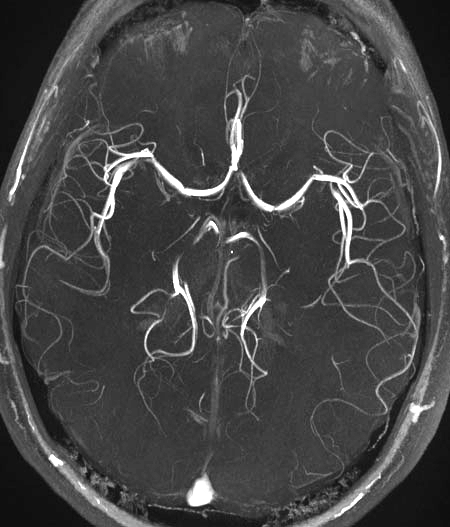

In [12]:
input = ij.scifio().datasetIO().open("https://upload.wikimedia.org/wikipedia/commons/6/66/Mra-mip.jpg")
ij.notebook().display(input)

Before we call the `Op` we have to define a few more parameters:

* The spacing parameter refers to a `double[]` that describes the physical distance between data points in the image. If this data is available then it should be used, otherwise [1, ... , 1] is usually acceptible

* The scale parameter refers to the pixel distance at which the filter operates. Larger structures will be found using larger scale parameters.

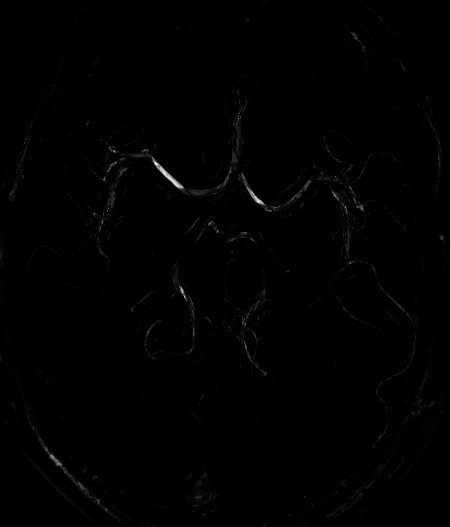

In [30]:
import net.imglib2.type.numeric.real.DoubleType
import net.imagej.notebook.NotebookService.ValueScaling;

//spacing refers to the physical distance between pixels. The default setting is {1, 1, 1...}
spacing = [1, 1, 1] as double[]

//scales refers the the pixel distance at which the filter operates. Larger scales measure larger structures.
scale = 8

actualOutput = ij.op().create().img(input, new DoubleType())
ij.op().filter().frangiVesselness(actualOutput, input, spacing, scale)
ij.notebook().display(actualOutput, 0, 1, 2, ValueScaling.DATA)

Clearly we are in need of some scaling. The output of `frangiVesselness` 